In [131]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [132]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [133]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [134]:
df.shape

(10000, 14)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [136]:
df.duplicated().sum()

0

In [137]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [138]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [139]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [140]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [141]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [142]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [143]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [144]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [145]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)



In [146]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [147]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu',))
model.add(Dense(1,activation='sigmoid'))

In [148]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_15 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [149]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [150]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5346 - accuracy: 0.7533 - val_loss: 0.4748 - val_accuracy: 0.7987
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.8025 - val_loss: 0.4442 - val_accuracy: 0.8081
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.8209 - val_loss: 0.4263 - val_accuracy: 0.8181
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8278 - val_loss: 0.4168 - val_accuracy: 0.8225
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8331 - val_loss: 0.4036 - val_accuracy: 0.8281
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.8391 - val_loss: 0.3889 - val_accuracy: 0.8375
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3829 - accuracy: 0.8445 - val_loss: 0.3755 - val_accuracy: 0.8388

In [151]:
model.layers

In [152]:
model.layers[0].get_weights()

[array([[ 0.7524619 , -0.32977477, -0.1569984 , -0.11089787,  0.12615381,
         -0.15052994, -0.00675861, -0.1856384 , -0.03888983, -0.38002163,
         -0.38994905],
        [-0.15529189,  0.8067514 , -0.9151787 , -0.8500007 ,  0.39642024,
          0.37768075, -0.41803452, -0.74782497,  0.43176115,  0.05715495,
          0.5990954 ],
        [-0.77323914,  0.43162185,  0.22834674,  0.02424141, -0.04799106,
          0.06999456,  0.19100669, -0.02148375,  0.12729938,  0.05259184,
          0.05026489],
        [-0.11328898, -0.30676514,  0.32463202,  0.0355334 ,  0.05669053,
         -0.3046956 , -0.92113274, -0.5697853 ,  0.13381884,  0.27439877,
          0.09225019],
        [ 0.16003783,  0.13593128, -0.05933825,  0.20072438, -0.24390814,
         -0.9619876 , -0.39879438, -0.28024527,  0.9129133 ,  0.86034316,
          0.55462426],
        [ 0.1928743 ,  0.34333113,  0.01668693, -0.39338517,  0.27124885,
          0.07602076, -0.11532196,  0.33580145,  0.06758418,  0.4563143

In [153]:
y_log=model.predict(X_test_scaled)

In [154]:
y_pred=np.where(y_log>0.5,1,0)

In [155]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.865

In [156]:
import matplotlib.pyplot as plt

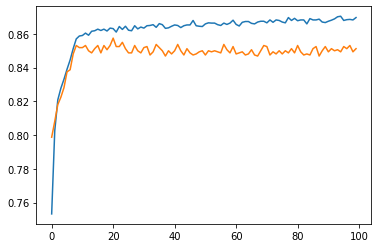

In [157]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

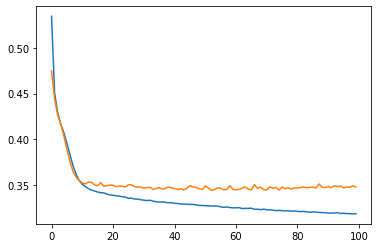

In [158]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])